In [1]:
import randolph
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import newton as newton
import scipy


## A. Code Tests

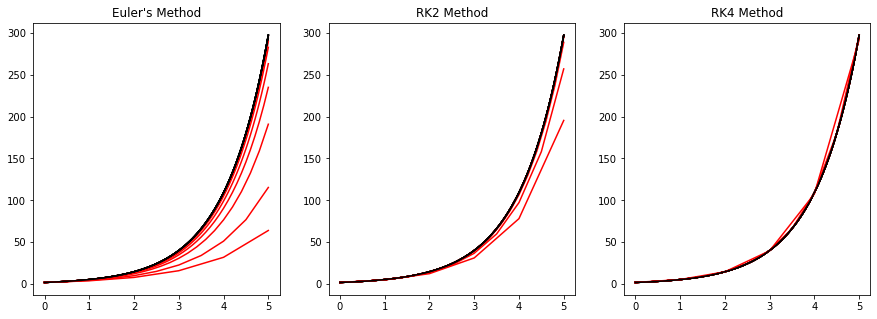

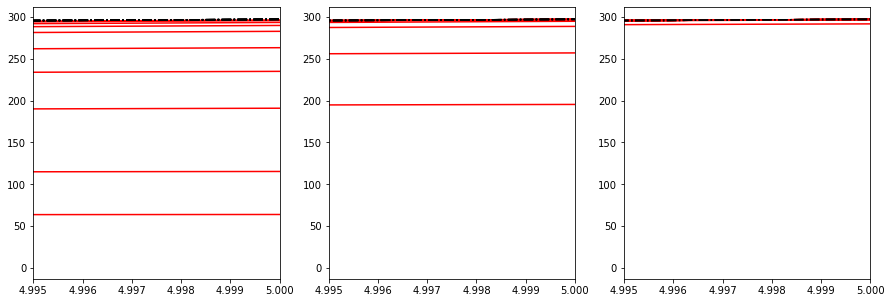

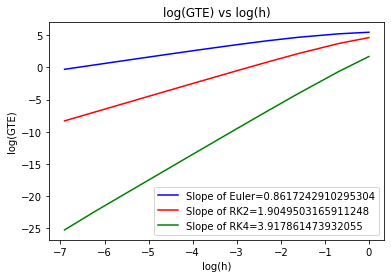

In [94]:
B = 4
D = 3
P0 = 2
T = 5

#Original function is set which describes the rate of change in the population
def f(t, P):
    return (B - D) * P

#Line function for use in the best fit line
def line(x, m, b):
    return m * x + b

#Actual population equation to campare to the numerical solutions
t = np.linspace(0, T, 101)
p = P0 * np.exp((B - D) * t)

#Population solutions using the three numerical methods
P_euler = randolph.dynamics_solve(f, s_0 = P0, method = 'Euler')
P_rk2 = randolph.dynamics_solve(f, s_0 = P0, method = 'RK2')
P_rk4 = randolph.dynamics_solve(f, s_0 = P0, method = 'RK4')


fig,ax1 = plt.subplots(1, 3, figsize = (15, 5))
fig,ax2 = plt.subplots(1, 3, figsize = (15, 5))

#Initialize the step sizes and error arrays for use in the global truncation error graph later
step_sizes = np.array([.001, .002, .005, .01, .02, .05, .1, .2, .5, 1.]) * T / 5
euler_error = np.zeros(10)
rk2_error = np.zeros(10)
rk4_error = np.zeros(10)

#Many numerical solutions are created to show how the error of each method responds to changes in step sizes
for i in range(10):
    h_prime = step_sizes[i]
    euler = randolph.dynamics_solve(f, s_0 = P0, method = 'Euler', h = h_prime, N = np.int(T / h_prime))
    rk2 = randolph.dynamics_solve(f, s_0 = P0, method = 'RK2', h = h_prime, N = np.int(T / h_prime))
    rk4 = randolph.dynamics_solve(f, s_0 = P0, method = 'RK4', h = h_prime, N = np.int(T / h_prime))
    
    #Global error is found by subtracting the final numerical result with the final actual value
    euler_error[i] = np.abs(euler[1][np.int(T / h_prime)] - p[100])
    rk2_error[i] = np.abs(rk2[1][np.int(T / h_prime)] - p[100])
    rk4_error[i] = np.abs(rk4[1][np.int(T / h_prime)] - p[100])
    
    #All the graphs are made to easily compare error values
    ax1[0].plot(euler[0], euler[1], 'r-')
    ax1[0].plot(t, p, 'k-')
    ax1[1].plot(rk2[0], rk2[1], 'r-')
    ax1[1].plot(t, p, 'k-')
    ax1[2].plot(rk4[0], rk4[1], 'r-')
    ax1[2].plot(t, p, 'k-')
    
    #A close-up of error values to show the accuracy of the different methods
    ax2[0].plot(euler[0], euler[1], 'r-')
    ax2[0].plot(t, p, 'k-.')
    ax2[1].plot(rk2[0], rk2[1], 'r-')
    ax2[1].plot(t, p, 'k-.')
    ax2[2].plot(rk4[0], rk4[1], 'r-')
    ax2[2].plot(t, p, 'k-.')
    ax2[1].set_xlim(T * .999, T)
    ax2[2].set_xlim(T * .999, T)
    ax2[0].set_xlim(T * .999, T)

ax1[0].set_title('Euler\'s Method')
ax1[1].set_title('RK2 Method')
ax1[2].set_title('RK4 Method')

#The slope is found for the best fit line of the log of the global error value vs the log of the time step size
gte = [scipy.optimize.curve_fit(line, np.log(step_sizes), np.log(np.abs(euler_error)), [1, 0])[0][0], scipy.optimize.curve_fit(line, np.log(step_sizes), np.log(np.abs(rk2_error)), [2, 0])[0][0], scipy.optimize.curve_fit(line, np.log(step_sizes), np.log(np.abs(rk4_error)), [4, 0])[0][0]]

#The graph for the log of the global error vs log of the time step; plotted on the same graph to show the order for each method (slope tells order)
fig,ax3 = plt.subplots()
ax3.plot(np.log(step_sizes), np.log(np.abs(euler_error)), label='Slope of Euler=' + str(gte[0]), color='b')
ax3.plot(np.log(step_sizes), np.log(np.abs(rk2_error)), label='Slope of RK2=' + str(gte[1]), color='r')
ax3.plot(np.log(step_sizes), np.log(np.abs(rk4_error)), label='Slope of RK4=' + str(gte[2]), color='g')
ax3.set_title('log(GTE) vs log(h)')
ax3.set_xlabel('log(h)')
ax3.set_ylabel('log(GTE)')



plt.legend()
plt.show()

"Sufficiently small" refers to the step size $h$ being less than the natural time step of the system ($\frac{1}{B-D}$ in this case). The size of the time step relative to the natural time step will affect how much error there will be at the end of the simulation, so the size can be taken to be sufficiently small such that the global truncation error is within an allowable value. 

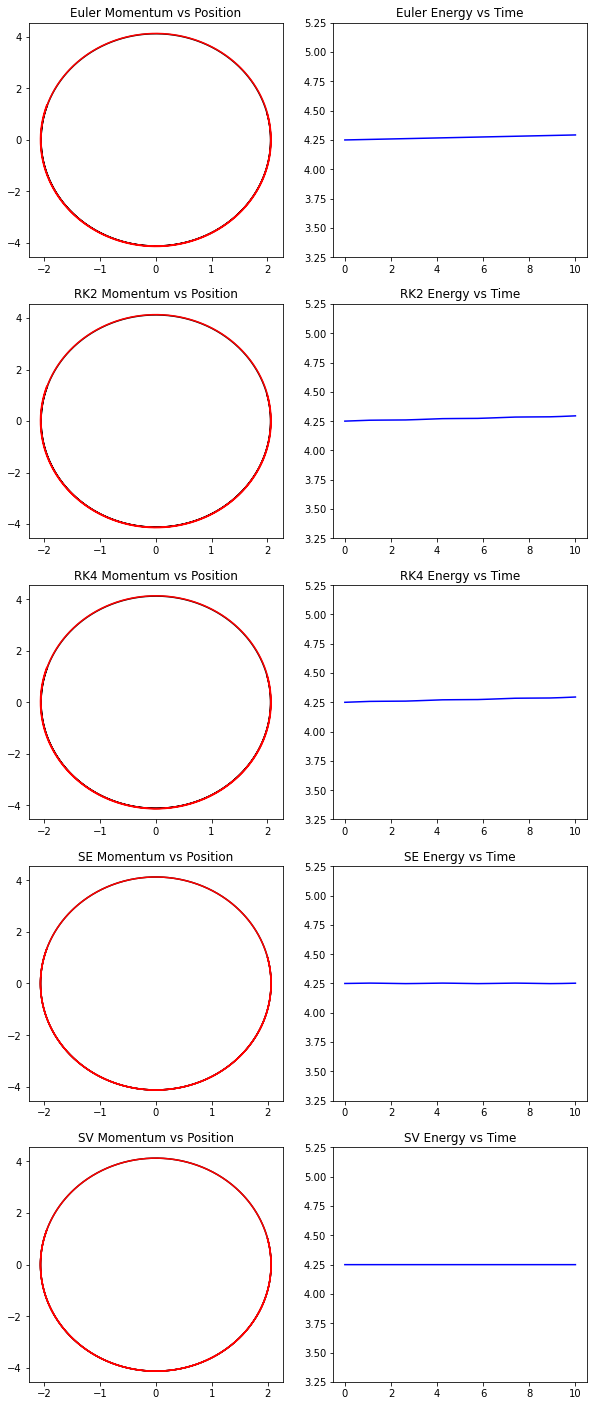

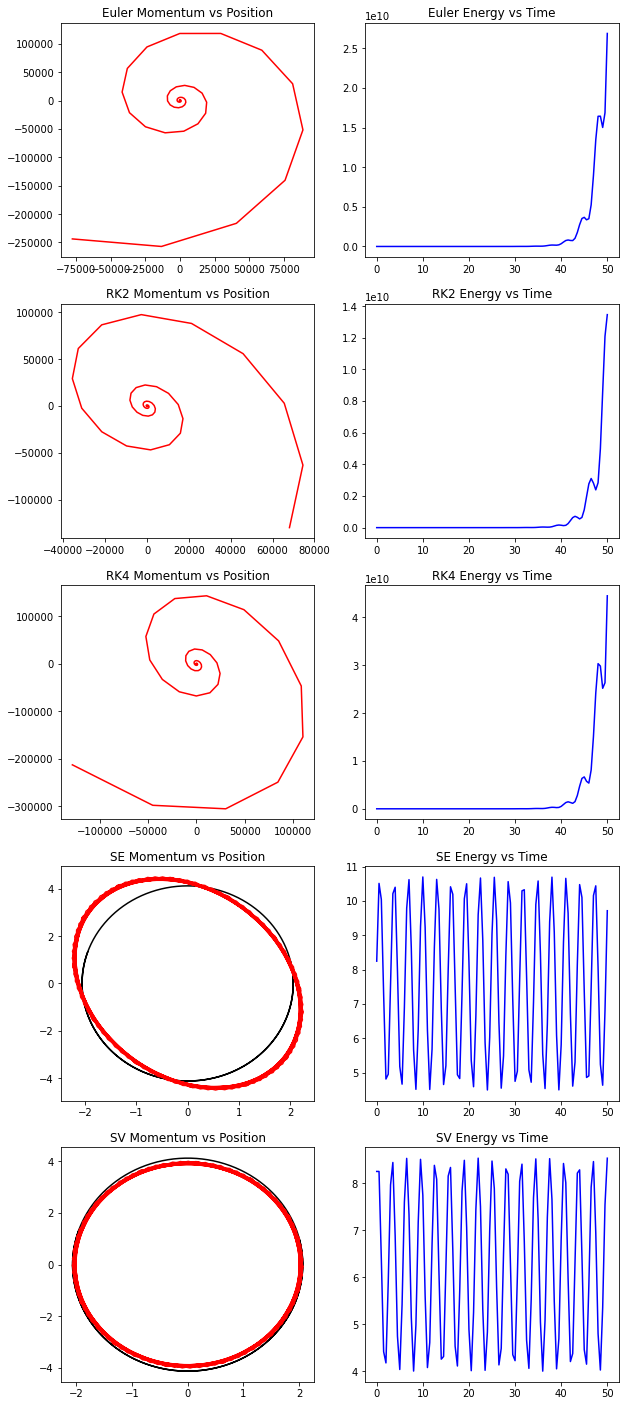

In [93]:
p0 = 1.
x0 = 2.
m = 2.
w = 1
methods = ['Euler', 'RK2', 'RK4', 'SE', 'SV']

#Partial of the Hamiltonian irt momentum and position for use in the hamiltonian_solve function
def d_pH(q, p):
    return p / m

def d_qH(q, p):
    return m * w ** 2 * q

#Actual values for position and mumentum for comparison later with numerical solutions
t_prime = np.linspace(0, 10, 1000)
q_prime = x0 * np.cos(w * t_prime) + p0 / m / w * np.sin(w * t_prime)
p_prime = m * (-x0 * w * np.sin(w * t_prime) + p0 / m * np.cos(w * t_prime))


#Plots of the momentum vs position to show that with a small enough step size, all methods are fairly accurate
fig,ax1 = plt.subplots(5, 2, figsize = (10, 25))
for i in range (5):
    [t, q, p] = randolph.hamiltonian_solve(d_qH, d_pH, q_0 = x0, p_0 = p0, method = methods[i], N = 10000, h = .001)
    
    #Momentum vs position plots with small step size
    ax1[i][0].plot(q_prime, p_prime, 'k')
    ax1[i][0].plot(q, p, 'r')
    ax1[i][0].set_title(str(methods[i]) + ' Momentum vs Position')
    
    #Plots showing that the energy is conserved (remains constant) when the step size is small enough
    ax1[i][1].plot(t, p ** 2 / 2 / m + w ** 2 * q ** 2 * m / 2, 'b')
    ax1[i][1].set_ylim(p[0] ** 2 / 2 / m + w ** 2 * q[0] ** 2 * m / 2 - 1, p[0] ** 2 / 2 / m + w ** 2 * q[0] ** 2 * m / 2 + 1)
    ax1[i][1].set_title(str(methods[i]) + ' Energy vs Time')

#Plots showing that when the simulation is ran long enough, all methods deviate somewhat from the actual value, 
#though the symplectic methods don't deviate much 
fig,ax2=plt.subplots(5, 2, figsize = (10, 25))
for i in range (5):
    [t, q, p]=randolph.hamiltonian_solve(d_qH, d_pH, q_0 = x0, p_0 = p0, method = methods[i], N = 100, h = .5)
    
    #Momentum vs position plots to show how the values deviate after a relatively long time with a large enough step size
    ax2[i][0].plot(q_prime, p_prime, 'k')
    ax2[i][0].plot(q, p, 'r')
    ax2[i][0].set_title(str(methods[i]) + ' Momentum vs Position')
    
    #Energy vs time graphs to show how energy is affected, where the energy increases exponentially for the RK methods and
    #oscillates for the symplectic methods
    ax2[i][1].plot(t, p ** 2 / 2 / m + w ** 2 * q ** 2 * m, 'b')
    ax2[i][1].set_title(str(methods[i]) + ' Energy vs Time')
    

plt.show()

The momentum vs position plots created using the RK methods tend to spiral outward, suggesting that the velocity and position get larger with each iteration. The momentum vs position plots created using the symplectic methods remain within the same relative magnitude, but the shape of the energy transfer doesn't match up.
The energy found using the RK methods increases exponentially and the energy found using the symplectic method oscillates near the actual energy value.

## B. Analysis of a more general population model

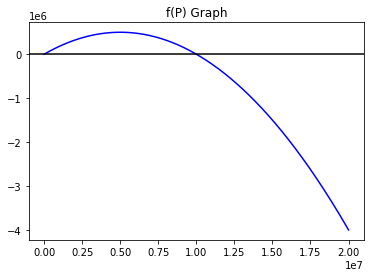

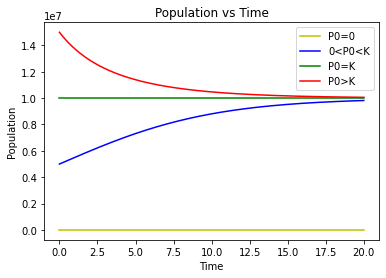

In [92]:
R = 0.2
K = 10E6
t = 0.0

#Defining the function which tells the rate of change of the population
def y(t, P):
    return R * (1 - P / K) * P


P = np.linspace(0, 2 * 10E6, 1000)

#f(P) is plotted to show the roots, where the horizontal line indicates f(P)=0 to show root values
fig,ax1 = plt.subplots()
ax1.plot(P, y(t,P), color = 'b')
ax1.axhline(y = 0, color = 'k')
ax1.set_title('f(P) Graph')

#Different simulations are created with initial conditions falling within the specified values
P1 = randolph.dynamics_solve(y, s_0 = 0, N = 200, method = 'RK4')
P2 = randolph.dynamics_solve(y, s_0 = 5E6, N = 200, method = 'RK4')
P3 = randolph.dynamics_solve(y, s_0 = K, N = 200, method = 'RK4')
P4 = randolph.dynamics_solve(y, s_0 = 15E6, N = 200, method = 'RK4')

#A plot with all the simulation situations is created to show the behavior of the population
fig,ax2 = plt.subplots()
ax2.plot(P1[0], P1[1], label = 'P0=0', color = 'y')
ax2.plot(P2[0], P2[1], label = '0<P0<K', color = 'b')
ax2.plot(P3[0], P3[1], label = 'P0=K', color = 'g')
ax2.plot(P4[0], P4[1], label = 'P0>K', color = 'r')
ax2.set_ylabel('Population')
ax2.set_xlabel('Time')
ax2.set_title('Population vs Time')


plt.legend()
plt.show()

1. The function $f(t,P(t))$ has two roots at $P=0$ and $P=K$. If the population ever reaches one of these values, the population will remain constant since $\frac{dP}{dt}=0$.
2. When $0<P<K$, $f$ is positive, so the population will increase.
3. When $K<P<\infty$, $f$ is negative, so the population will decrease.
4. When $P_0=0$, the population will remain constant. When $0<P_0<K$, the population will increase and asymptotically approach $K$. When $P_0=K$, the population will remain constant. When $K<P_0$, the population will decrease and asymptotically approach $K$.
5. $K$ is the value at which the environment can sustain the population. If the population is less than $K$, there will be enough resources to allow the population to grow; if the population is greater than $K$, there won't be enough resources to sustain the population, so it will start to die off.
6. My numerical solutions agree with my predictions, although I didn't anticipate the role in with the $R$ value came into play. It appears that $R$ determines how quickly the population reaches equilibrium at $P=K$. Also, I didn't consider the comparative rates of increase or decrease -- when $P_0<K$, the magnitude of the rate of change is smaller than when $P>K$, suggesting that the population dies off quicker than it grows.  

## C. Analysis of an even more general population model

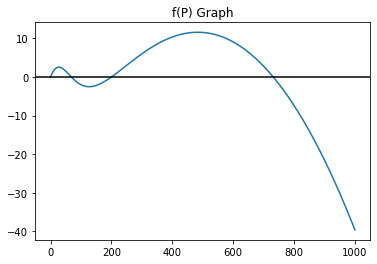

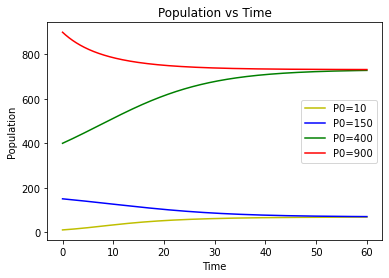

In [95]:
R = 0.2
K = 1000
C = 40
P_c = 100

#Definitions for the rate of change of the population are created, one for use in general and one for use in the newton-raphson
#root finding method 
def y(t, P):
    return R * (1 - P / K) * P - C * P ** 2 / (P_c ** 2 + P ** 2)
def y2(P):
    return y(0.0, P)


t = 0.0
p = np.linspace(0, 1000, 1000)

#Plot of f(P) to show the roots and behavior of f(P), where the horizontal line represents f(P)=0 to show root values
fig,ax1=plt.subplots()
ax1.plot(p, y(t, p))
ax1.axhline(y = 0,color = 'k')
ax1.set_title('f(P) Graph')

#Using the newton-raphson root finding method
zeros = newton(y2, [0, 50, 200, 750])

#Various simulations are made with initial conditions falling within the specified regions
P1 = randolph.dynamics_solve(y, s_0 = 10, N = 600, method = 'RK4')
P2 = randolph.dynamics_solve(y, s_0 = 150, N = 600, method = 'RK4')
P3 = randolph.dynamics_solve(y, s_0 = 400, N = 600, method = 'RK4')
P4 = randolph.dynamics_solve(y, s_0 = 900, N = 600, method = 'RK4')

#A plot is created to show the behavior of the population given various initial conditions
fig,ax2 = plt.subplots()
ax2.plot(P1[0], P1[1], label = 'P0=10', color = 'y')
ax2.plot(P2[0], P2[1], label = 'P0=150', color = 'b')
ax2.plot(P3[0], P3[1], label = 'P0=400', color = 'g')
ax2.plot(P4[0], P4[1], label = 'P0=900', color = 'r')
ax2.set_title('Population vs Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')

          
plt.legend()
plt.show()

1. The function has four real roots. They are 0, 68.34, 200, and 731.66.
2. The various regions are (0,68.34), (68.34,200), (200,731.66), (731.66,$\infty$).
3. Since $f$ is positive in the regions (0,68.34) and (200,731.66), the population will increase and asymptotically approach 68.34 and 731.66 respectively. Then, since $f$ is negative in the regions (68.34,200) and (731.66,$\infty$), the population will decrease and asymptotically approach 68.34 and 731.66 respectively.
4. The numerical solutions agree with what I predicted, but again I didn't take into account how quickly the populations would approach the asymptotes for each region. I also didn't consider that the population would deviate away from one of the roots at $P=200$.
5. A "fixed point" is a point in which $\dot{x}=0$; an "attractor" is a value which a system tends toward. In this model, the fixed points tell where the population will remain constant and the attractors tell where the populations will approach asymptotically (or the population values where the population increases or decreases towards). The attractors are fixed points that the population approaches. Fixed points could also not be an attractor. For this system, $P=200$ is an example of a fixed point that isnt an attractor since the population deviates away from this value.

## D. Simulation and analysis of the two-body orbital dynamics problem

The distance between the focus and the center of the gravitational field is 7.915177806694373e-05


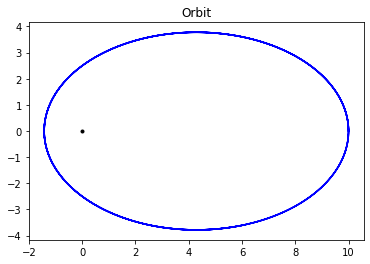

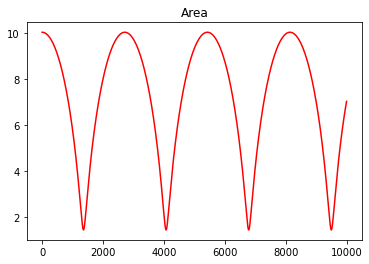

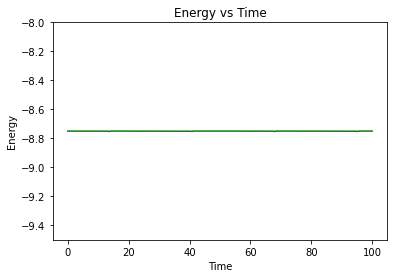

In [138]:
x0 = 10
y0 = 0
px0 = 0
py0 = 5
k = 100
mu = 10

q0 = np.array([x0, y0])
p0 = np.array([px0, py0])

#Definitions for the partial derivatives of both the positions and momentum
def d_qH(q, p):
    return np.array([k * q[0] / (q[0] ** 2 + q[1] ** 2) ** (3 / 2), k * q[1] / (q[0] ** 2 + q[1] ** 2) ** (3 / 2)])
def d_pH(q, p):
    return np.array([p[0] / mu, p[1] / mu])


[t, q, p] = randolph.hamiltonian_solve(d_qH, d_pH, q_0 = q0, p_0 = p0, method = 'SV', D = 2, N = 10000, h = .01)


#Plot of the orbit with the black dot representing the center of the gravitational field
fig,ax = plt.subplots()
ax.plot(q[0], q[1], color='b')
ax.plot(0, 0, 'k.')
ax.set_title('Orbit')

#Calculation of the position of the focus using c**2=a**2-b**2 (with the appropriate horizontal shift)
center = [(np.max(q[0]) + np.min(q[0])) / 2,(np.max(q[1]) + np.min(q[1])) / 2]
focus = np.sqrt((np.max(q[0]) - center[0]) ** 2 - np.max(q[1]) ** 2) - center[0]
print('The distance between the focus and the center of the gravitational field is ' + str(focus))

#Calculation of the area values using the average length between a position vector and the one right after it, then
#multiplying that length by the length of the difference vector
areas = np.zeros(np.shape(q[0])[0] - 1)
for i in range(np.shape(q[0])[0] - 1):
    areas[i] = np.sqrt(q[0][i] ** 2 + q[1][i] ** 2) + np.sqrt(q[0][i + 1] ** 2 + q[1][i + 1] ** 2) / 2 * np.sqrt((q[0][i + 1] - q[0][i]) ** 2 + (q[1][i + 1] - q[1][i]) ** 2)

#Plot of the calculated areas
fig,ax1 = plt.subplots()
ax1.plot(np.array([i for i in range(np.shape(q[0])[0] - 1)]), areas,color='r')
ax1.set_title('Area')

#Plot showing the conservation of energy
fig,ax2 = plt.subplots()
ax2.plot(t, (p[0] ** 2 + p[1] ** 2) / 2 / mu - k / np.sqrt(q[0] ** 2 + q[1] ** 2),color='g')
ax2.set_ylim(-9.5, -8)
ax2.set_title('Energy vs Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Energy')


plt.show()

I chose 0.01 because I found that the orbital period is about 27; to find a step sufficiently small, I decided to use sumething at most $10^{-3}$ smaller than the natural time step.
For Kepler's first law, I was able to show that the center of the graviational field was the focus of the orbit's ellipse with a difference in position of about 8e-5. Unfortunately, for Kepler's second law, the area is oscillating, likely due to my poor calculation for the area (there's a lot of rounding error when the orbit is close to the center of the gravitational field). Also, for Kepler's third law, the numpy.cross function wasn't working for me; if it had been, I could've used the angular momentum equation $L=r\times p$ to find $\omega$ and then T. With various values for the period, I could plot the square of the period vs the position cubed. Then, I'd have created a best fit line to find the value for the slope.
I was able to prove the constant value for energy, but as I mentioned, the numpy.cross function wasn't working well for me, so it was difficult to prove conservation of angular momentum.

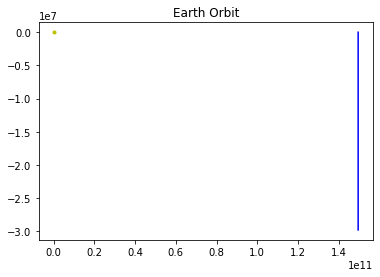

In [249]:
#All of the initial conditions I received from the NASA website
x0 = 149598262000
y0 = 0.
m1=5972190. * 10 ** (18)
m2=1.989 * 10 ** (30)
px0 = 0.
py0 = -m1 * 107218/3600*1000
k = 6.67 * 10 ** (-11) * m2 * m1
mu = m1
q0 = np.array([x0, y0])
p0 = np.array([px0, py0])

#Definitions for the partial derivatives of both the positions and momentum
def d_qH(q, p):
    return np.array([k * q[0] / (q[0] ** 2 + q[1] ** 2) ** (3 / 2), k * q[1] / (q[0] ** 2 + q[1] ** 2) ** (3 / 2)])
def d_pH(q, p):
    return np.array([p[0] / mu, p[1] / mu])


[t, q, p] = randolph.hamiltonian_solve(d_qH, d_pH, q_0 = q0, p_0 = p0, method = 'SV', D = 2, N = 100000, h = .01)


#Plot of the orbit with the yellow dot representing the sun
fig,ax = plt.subplots()
ax.plot(q[0], q[1], color='b')
ax.plot(0, 0, 'y.')
ax.set_title('Earth Orbit')

plt.show()

All of the initial data I used came from NASA's official website (https://solarsystem.nasa.gov/planets/earth/by-the-numbers/). Unfortunately, it doesn't seem like my code is allowing any movement in the x direction. Strangely, it didn't have this bug earlier in the previous section. After four hours trying to find what's wrong, I can't figure it out.